In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings

In [183]:
df=pd.read_csv('mytrain.csv')
df_test=pd.read_csv('test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [186]:
age=df["Age"].replace(np.nan,df['Age'].mean)
df['Age']=pd.to_numeric(df['Age'])





In [187]:
df=df.drop(['Cabin','Name',"Ticket",'PassengerId'],axis=1)
df_test=df_test.drop(['Cabin','Name',"Ticket",'PassengerId'],axis=1)

df=df.dropna()
df_test=df_test.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [189]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [191]:
X=df.drop(['Survived'],axis=1)
Y=df['Survived']

In [192]:
num_features=X.select_dtypes(exclude="object").columns
cat_features =X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numaric_transform=StandardScaler()
cat_transform=OneHotEncoder()

preprocess=ColumnTransformer(
    [
    #('numerical',numaric_transform,num_features),
    ('cat_transform',cat_transform,cat_features)
    ]
)



In [193]:
X=preprocess.fit_transform(X)
test=preprocess.fit_transform(df_test)

X.shape

(712, 5)

In [194]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=32,test_size=0.1)
X_train.shape,X_test[:,6:7].shape

((640, 5), (72, 0))

In [195]:
def evaluate_model(actual,predict):
    mse=mean_squared_error(actual,predict)
    mae=mean_absolute_error(actual,predict)
    rmse=np.sqrt(mse)
    r2_score_=r2_score(actual,predict)
    return mse,mae,r2_score_,rmse

In [196]:
model_dict={
    "catboost" : CatBoostClassifier(iterations=2000,learning_rate=0.0001),
    ""
    "SVC":SVC(C=1,kernel="poly"),
    "k-nnc":KNeighborsClassifier(),
    "DecisionTreeRegressor":DecisionTreeClassifier(),
    "AdaBoostRegressor":AdaBoostClassifier(),
    "XGBRegressor":XGBClassifier(),
    "RandomForestRegressor":RandomForestClassifier(), 
}

In [197]:
model_list =[]
r2_list=[]
i=0
for model_name in model_dict:
    model=model_dict[model_name]
    model.fit(X_train,y_train)

    y_train_pre=model.predict(X_train)
    y_test_pre=model.predict(X_test)

    model_train_mse,model_train_mae,model_train_r2_score,model_train_rmse=evaluate_model(y_train,y_train_pre)
    model_test_mse,model_test_mae,model_test_r2_score,model_test_rmse=evaluate_model(y_test,y_test_pre)
    print(list(model_dict.keys())[i])
    model_list.append(list(model_dict.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2_score))
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)
    
    print('='*35)
    print('\n')
    i+=1
   
    

0:	learn: 0.6931069	total: 2.27ms	remaining: 4.53s
1:	learn: 0.6930689	total: 4.11ms	remaining: 4.11s
2:	learn: 0.6930307	total: 5.91ms	remaining: 3.93s
3:	learn: 0.6929916	total: 7.84ms	remaining: 3.91s
4:	learn: 0.6929510	total: 9.77ms	remaining: 3.9s
5:	learn: 0.6929078	total: 11.7ms	remaining: 3.88s
6:	learn: 0.6928730	total: 14ms	remaining: 3.99s
7:	learn: 0.6928329	total: 16ms	remaining: 3.98s
8:	learn: 0.6927912	total: 17.9ms	remaining: 3.96s
9:	learn: 0.6927521	total: 19.6ms	remaining: 3.91s
10:	learn: 0.6927114	total: 21.6ms	remaining: 3.9s
11:	learn: 0.6926713	total: 23.5ms	remaining: 3.9s
12:	learn: 0.6926329	total: 25.2ms	remaining: 3.86s
13:	learn: 0.6925919	total: 27.2ms	remaining: 3.85s
14:	learn: 0.6925495	total: 46.2ms	remaining: 6.11s
15:	learn: 0.6925096	total: 50.2ms	remaining: 6.22s
16:	learn: 0.6924687	total: 56.6ms	remaining: 6.6s
17:	learn: 0.6924335	total: 67.1ms	remaining: 7.39s
18:	learn: 0.6923944	total: 76.1ms	remaining: 7.93s
19:	learn: 0.6923541	total: 88

In [201]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential(
    [
        layers.Dense(5, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        
        layers.Dense(1, activation="sigmoid",name="layer3"),
    ]
)




lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)
model.compile(optimizer = keras.optimizers.Adam(learning_rate=lr_schedule), loss="mse", metrics=["accuracy"])

history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=30)

Epoch 1/100
22/22 [==============================] - 1s 30ms/step - loss: 0.2526 - accuracy: 0.5297 - val_loss: 0.2195 - val_accuracy: 0.7500
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2103 - accuracy: 0.7828 - val_loss: 0.2014 - val_accuracy: 0.7500
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.1948 - accuracy: 0.7828 - val_loss: 0.1937 - val_accuracy: 0.7500
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.1858 - accuracy: 0.7828 - val_loss: 0.1883 - val_accuracy: 0.7500
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1801 - accuracy: 0.7828 - val_loss: 0.1852 - val_accuracy: 0.7500
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.1765 - accuracy: 0.7828 - val_loss: 0.1821 - val_accuracy: 0.7500
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 0.1737 - accuracy: 0.7828 - val_loss: 0.1810 - val_accuracy: 0.7500
Epoch 8/100

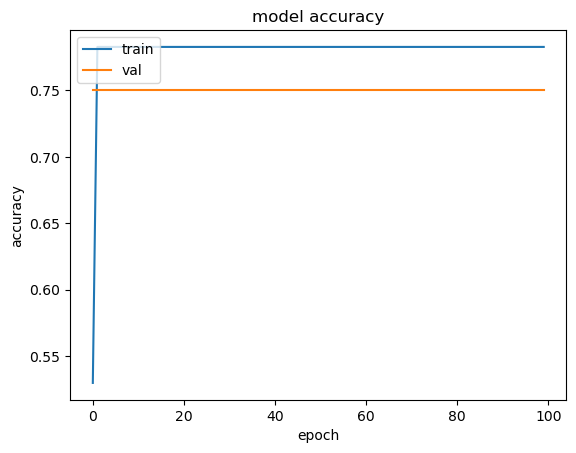

In [202]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [204]:
model.predict(test)

11/11 [==============================] - 0s 3ms/step


array([[0.17477463],
       [0.7168198 ],
       [0.17477463],
       [0.17477463],
       [0.7168198 ],
       [0.17477463],
       [0.618327  ],
       [0.17477463],
       [0.88281465],
       [0.17477463],
       [0.17477463],
       [0.7168198 ],
       [0.17477463],
       [0.7168198 ],
       [0.88281465],
       [0.17477463],
       [0.32567486],
       [0.7168198 ],
       [0.88281465],
       [0.32567486],
       [0.17477463],
       [0.32567486],
       [0.88281465],
       [0.17477463],
       [0.88281465],
       [0.32567486],
       [0.17477463],
       [0.17477463],
       [0.17477463],
       [0.7168198 ],
       [0.32567486],
       [0.32567486],
       [0.7168198 ],
       [0.17477463],
       [0.32567486],
       [0.17477463],
       [0.7168198 ],
       [0.7168198 ],
       [0.17477463],
       [0.32567486],
       [0.88281465],
       [0.7168198 ],
       [0.17477463],
       [0.32567486],
       [0.7168198 ],
       [0.7168198 ],
       [0.17477463],
       [0.174

In [200]:
model.save(filepath="Titanic")

INFO:tensorflow:Assets written to: Titanic\assets
